<a href="https://colab.research.google.com/github/pe8sutd/DSL2025/blob/main/Verilog_HDL_Block_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("[INFO]: Init the Verilog ENV")
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

[INFO]: Init the Verilog ENV


ModuleNotFoundError: No module named 'plugin'

# Verilog HDL Block - SSD (Seven Segment Display)

## Seven Segment Display (SSD) for Basys-3

![Basys 3 Board Feature](https://digilent.com/reference/_media/basys3_hardware_walkaround.png)

Basys 3 Board Feature

![7 Segment Display](https://digilent.com/reference/_media/basys3-_seven_segment_display_driving.png?w=600&tok=0639f2)

7 Segment Display

![7-segment LED display for decimal number from 0 to 9](https://digilent.com/reference/_media/basys3-_seven_segment_display.png?w=600&tok=b48b86)

7-segment LED display for decimal number from 0 to 9

![7 Segment Display on the Basys3](https://digilent.com/reference/_media/basys3-_basic_io_block_diagram.png?w=600&tok=2661a2)

7 Segment Display on the Basys3

Table 1: Truth Table for Common Anode type BCD to Seven Segment Decoder, including DP

| x | x | x  | x  | x  | x  | x | x  |    | x  | x  | x  | x  | x  | x  | x | x      | CA to DP    | CA to DP | x | DP to CA    | DP to CA | x |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:------:|:-----------:|:--------:|:---:|:-----------:|:--------:|:---:|
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| d |   | d3 | d2 | d1 | d0 |   | CA | CB | CC | CD | CE | CF | CG | DP |   | Common | Cathode     | Cathode  |   | Cathode     | Cathode  | d |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   | Anode  | [7:0]       | [7:0]    |   | [7:0]       | [7:0]    |   |
| 0 |   | 0  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 1  | 1  |   | 1’b1   | 8’b00000011 | 8'h03    |   | 8’b11000000 | 8'hC0    | 0 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 1 |   | 0  | 0  | 0  | 1  |   | 1  | 0  | 0  | 1  | 1  | 1  | 1  | 1  |   | 1’b1   | 8’b10011111 | 8'h9F    |   | 8’b11111001 | 8'hF9    | 1 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 2 |   | 0  | 0  | 1  | 0  |   | 0  | 0  | 1  | 0  | 0  | 1  | 0  | 1  |   | 1’b1   | 8’b00100101 | 8'h25    |   | 8’b10100100 | 8'hA4    | 2 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 3 |   | 0  | 0  | 1  | 1  |   | 0  | 0  | 0  | 0  | 1  | 1  | 0  | 1  |   | 1’b1   | 8’b00001101 | 8'h0D    |   | 8’b10110000 | 8'hB0    | 3 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 4 |   | 0  | 1  | 0  | 0  |   | 1  | 0  | 0  | 1  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b10011001 | 8'h99    |   | 8’b10011001 | 8'h99    | 4 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 5 |   | 0  | 1  | 0  | 1  |   | 0  | 1  | 0  | 0  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b01001001 | 8'h49    |   | 8’b10010010 | 8'h92    | 5 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 6 |   | 0  | 1  | 1  | 0  |   | 0  | 1  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 8’b01000001 | 8'h41    |   | 8’b10000010 | 8'h82    | 6 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 7 |   | 0  | 1  | 1  | 1  |   | 0  | 0  | 0  | 1  | 1  | 1  | 1  | 1  |   | 1’b1   | 8’b00011111 | 8'h1F    |   | 8’b11111000 | 8'hF8    | 7 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 8 |   | 1  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 8’b00000001 | 8'h01    |   | 8’b10000000 | 8'h80    | 8 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |    |   |        |             |          |   |             |          |   |
| 9 |   | 1  | 0  | 0  | 1  |   | 0  | 0  | 0  | 0  | 1  | 0  | 0  | 1  |   | 1’b1   | 8’b00001001 | 8'h09    |   | 8’b10010000 | 8'h09    | 9 |





## Look-up Table using "case" statement

Using case statement, the Verilog code for this module can be implemented by directly mapping the Truth Table to the case statement. Take note to include a default statement.


```
//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r) begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'h11111000;    //NUM "7"
        4'b1000:segment_r <= 8'h10000000;    //NUM "8"
        4'b1001:segment_r <= 8'h10010000;    //NUM "9"
        default: segment_r <= 8'hff;
    endcase
end
```

The binary number is more often represented in hex.

```
//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in hex
always @(cur_num_r)
begin
    case(cur_num_r)
        4'd0:segment_r <= 8'hc0;    //NUM "0"
        4'd1:segment_r <= 8'hf9;    //NUM "1"
        4'd2:segment_r <= 8'ha4;    //NUM "2"
        4'd3:segment_r <= 8'hb0;    //NUM "3"
        4'd4:segment_r <= 8'h99;    //NUM "4"
        4'd5:segment_r <= 8'h92;    //NUM "5"
        4'd6:segment_r <= 8'h82;    //NUM "6"
        4'd7:segment_r <= 8'hF8;    //NUM "7"
        4'd8:segment_r <= 8'h80;    //NUM "8"
        4'd9:segment_r <= 8'h90;    //NUM "9"
        default: segment_r <= 8'hff;
    endcase
end
```


The above core can be part of the module below.

In [ ]:
%%print_verilog

//
module b7a(segment_r,cur_num_r);
 output [7:0] segment_r;
 input [3:0] cur_num_r;

reg [7:0] segment_r;        //Register - Drive 7 Segment

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'b11111000;    //NUM "7"
        4'b1000:segment_r <= 8'b10000000;    //NUM "8"
        4'b1001:segment_r <= 8'b10010000;    //NUM "9"
        default:segment_r <= 8'hff;
    endcase
end

endmodule

In [ ]:
%%verilog

//
module b7a(segment_r,cur_num_r);
 output [7:0] segment_r;
 input [3:0] cur_num_r;

reg [7:0] segment_r;        //Register - Drive 7 Segment

//Decode BCD NUM into corrosponding 7Segment Code; dp to ca
//in binary
always @(cur_num_r)
begin
    case(cur_num_r)
        4'b0000:segment_r <= 8'b11000000;    //NUM "0"
        4'b0001:segment_r <= 8'b11111001;    //NUM "1"
        4'b0010:segment_r <= 8'b10100100;    //NUM "2"
        4'b0011:segment_r <= 8'b10110000;    //NUM "3"
        4'b0100:segment_r <= 8'b10011001;    //NUM "4"
        4'b0101:segment_r <= 8'b10010010;    //NUM "5"
        4'b0110:segment_r <= 8'b10000010;    //NUM "6"
        4'b0111:segment_r <= 8'b11111000;    //NUM "7"
        4'b1000:segment_r <= 8'b10000000;    //NUM "8"
        4'b1001:segment_r <= 8'b10010000;    //NUM "9"
        default:segment_r <= 8'hff;
    endcase
end

endmodule
////

//
module b7a_tb;
 wire [7:0] segment_r;
 reg [3:0] cur_num_r;

b7a b7a1(segment_r,cur_num_r);

initial begin
    $dumpfile("b7a.vcd");
    $dumpvars(0,b7a_tb);

    cur_num_r=4'd0;
    #1 cur_num_r=4'd1;
    #1 cur_num_r=4'd2;
    #1 cur_num_r=4'd3;
    #1 cur_num_r=4'd4;
    #1 cur_num_r=4'd5;
    #1 cur_num_r=4'd6;
    #1 cur_num_r=4'd7;
    #1 cur_num_r=4'd8;
    #1 cur_num_r=4'd9;
    #1 cur_num_r=4'd10;
    #1 cur_num_r=4'd11;
    #1 $finish;

    $dumpoff;
end

endmodule

////

In [ ]:
%%waveform b7a.vcd
sign_list = ['b7a_tb.b7a1.segment_r','b7a_tb.cur_num_r']
time_begin = 0
time_end = 11
base = 'hex' # bin, dec, dec2, hex, octal

Sometimes, the 7-Segment (CA to CG) and dp are not in the same case statement.

Table 2: Truth Table for Common Anode type BCD to Seven Segment Decoder, not including DP

| d |   | b3 | b2 | b1 | b0 |   | CA | CB | CC | CD | CE | CF | CG |   | Common | Cathode    | Cathode |   | Cathode    | Cathode |   |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:------:|:----------:|:-------:|:---:|:----------:|:-------:|:---:|
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   | Anode  | [6:0]      | [6:0]   |   | [6:0]      | [6:0]   |   |
| 0 |   | 0  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 1  |   | 1’b1   | 7’b0000001 | 7'h01   |   | 7’b1000000 | 7'h40   | 0 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 1 |   | 0  | 0  | 0  | 1  |   | 1  | 0  | 0  | 1  | 1  | 1  | 1  |   | 1’b1   | 7’b1001111 | 7'h4F   |   | 7’b1111001 | 7'h79   | 1 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 2 |   | 0  | 0  | 1  | 0  |   | 0  | 0  | 1  | 0  | 0  | 1  | 0  |   | 1’b1   | 7’b0010010 | 7'h12   |   | 7’b0100100 | 7'h24   | 2 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 3 |   | 0  | 0  | 1  | 1  |   | 0  | 0  | 0  | 0  | 1  | 1  | 0  |   | 1’b1   | 7’b0000110 | 7'h06   |   | 7’b0110000 | 7'h30   | 3 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 4 |   | 0  | 1  | 0  | 0  |   | 1  | 0  | 0  | 1  | 1  | 0  | 0  |   | 1’b1   | 7’b1001100 | 7'h4C   |   | 7’b0011001 | 7'h19   | 4 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 5 |   | 0  | 1  | 0  | 1  |   | 0  | 1  | 0  | 0  | 1  | 0  | 0  |   | 1’b1   | 7’b0100100 | 7'h24   |   | 7’b0010010 | 7'h12   | 5 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 6 |   | 0  | 1  | 1  | 0  |   | 0  | 1  | 0  | 0  | 0  | 0  | 0  |   | 1’b1   | 7’b0100000 | 7'h20   |   | 7’b0000010 | 7'h02   | 6 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 7 |   | 0  | 1  | 1  | 1  |   | 0  | 0  | 0  | 1  | 1  | 1  | 1  |   | 1’b1   | 7’b0001111 | 7'h0F   |   | 7’b1111000 | 7'h78   | 7 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 8 |   | 1  | 0  | 0  | 0  |   | 0  | 0  | 0  | 0  | 0  | 0  | 0  |   | 1’b1   | 7’b0000000 | 7'h00   |   | 7’b0000000 | 7'h00   | 8 |
|   |   |    |    |    |    |   |    |    |    |    |    |    |    |   |        |            |         |   |            |         |   |
| 9 |   | 1  | 0  | 0  | 1  |   | 0  | 0  | 0  | 0  | 1  | 0  | 0  |   | 1’b1   | 7’b0000100 | 7'h04   |   | 7’b0010000 | 7'h10   | 9 |


## 4 SSD

Basys3 board has 4 7-segment displays (LED3, LED2, LED1, LED0), that can be turned on through AN[3:0].


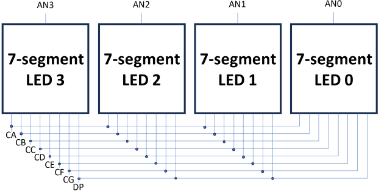

Figure 5: 4-digit 7-segment LED display connectivity

## Time multiplexing

The cathodes (CA ... DP) of four seven-segment LEDs on Basys 3 are connected together as shown in Figure 5. The reason is the FPGA chip has limited pin out, or it is a way of saving pin count.
Thus, to display 4 different numbers on the 4-digit seven-segment LED display, the cathodes (CA-CG) of the four seven-segment LEDs have to be controlled separately by activating the four seven-segment LEDs at different times (Time Multiplexing).
For example, when LED-1 is activated by driving AN1 high and the other three LEDs (LED-0, LED-2, LED-3) are deactivated (AN0, AN2, and AN3 not driven), the cathode pattern (CA-CG) will be used for displaying numbers on LED-1.
Similarly, LED-0 - LED-3 can be displayed by using the same way at different times.

As shwon in Figure 6, four seven-segment LEDs can be activated by using 4 PNP transistors AN0-AN3. When a transistor is on or the Base terminal (W4, U4, V4, or U2) is low, the corresponding anode is driven high (3.3 V) to activate or enable the corresponding seven-segment LED.
When a LED is deactivated after illuminating, it will darken. To avoid the displaying discontinuity perceived by the human eye, the four seven-segment LEDs should be continuously refreshed at 60 Hz or above (but not too high, usually at 1 kHz), e.g. it should be refreshed at every 1 ms to 16 ms (60 Hz) to 1 ms (1 kHz).


In [ ]:

print("For 60 Hz, t = ", 1/60*1000, "ms")
print("For 1 kHz, t = ", 1/1000*1000, "ms")


For 60 Hz, t =  16.666666666666668 ms
For 1 kHz, t =  1.0 ms



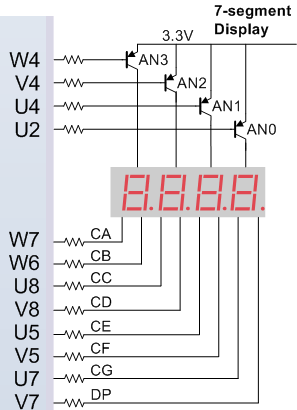

Figure 6: SSD driving circuit

Verilog that related to SSD, extracted from Stopwatch code.

The multiplexing frequency is 500 Hz (60 Hz to 1 kHz), almost 10 times of 50 Hz / 60 Hz, which is fast enough for eyes to detect the multiplexing sequence. The sequence rotates at:

```
DIG3 -> DIG2 -> DIG1 -> DIG4 -> DIG3
 ^                               |
 |_______________________________v
```


```
case(an_r)
        4'b0001: an_r <= 4'b0010;   //DISPLAY ON DIG3
        4'b0010: an_r <= 4'b0100;   //DISPLAY ON DIG2
        4'b0100: an_r <= 4'b1000;   //DISPLAY ON DIG1
        4'b1000: an_r <= 4'b0001;   //DISPLAY ON DIG4
        default: an_r <= 4'b0001;   //DISPLAY ON DIG4
endcase
```

The multiplexing is achieved through "case" statement in synchronous "always" block that is triggered at 500 Hz clock positive edge.
```
always @(negedge rstn or posedge clk_500hz)
```


Please run the following simulation to view the wave of 7-Segment Driver;

In [ ]:
%%verilog
module drv_7segment(
    input           rstn_i,
    input           clk_500hz,
    input   [3:0]   num3_i,
    input   [3:0]   num2_i,
    input   [3:0]   num1_i,
    input   [3:0]   num0_i,
    output  [3:0]   an_o,
    output  [7:0]   seg_o
);

reg [7:0] segment_r;
reg [3:0] cur_num_r;
reg [3:0] an_r;

assign an_o = ~an_r;       // Common anode inversion
assign seg_o = segment_r;  // Direct segment output

// Anode rotation logic
always @(negedge rstn_i, posedge clk_500hz) begin
    if (!rstn_i) an_r <= 4'b0000;
    else case (an_r)
        4'b0001: an_r <= 4'b0010;  // DIG3
        4'b0010: an_r <= 4'b0100;  // DIG2
        4'b0100: an_r <= 4'b1000;  // DIG1
        default: an_r <= 4'b0001;  // DIG4 (including reset state)
    endcase
end

// Direct input digit selection
always @(*) begin
    case (an_r)
        4'b0001: cur_num_r = num0_i;  // DIG4 (LSB)
        4'b0010: cur_num_r = num1_i;  // DIG3
        4'b0100: cur_num_r = num2_i;  // DIG2
        4'b1000: cur_num_r = num3_i;  // DIG1 (MSB)
        default: cur_num_r = 4'b0;    // All off
    endcase
end

// 7-segment decoder
always @(*) begin
    case (cur_num_r)
        4'h0: segment_r = 8'hC0;  // 0
        4'h1: segment_r = 8'hF9;  // 1
        4'h2: segment_r = 8'hA4;  // 2
        4'h3: segment_r = 8'hB0;  // 3
        4'h4: segment_r = 8'h99;  // 4
        4'h5: segment_r = 8'h92;  // 5
        4'h6: segment_r = 8'h82;  // 6
        4'h7: segment_r = 8'hF8;  // 7
        4'h8: segment_r = 8'h80;  // 8
        4'h9: segment_r = 8'h90;  // 9
        default: segment_r = 8'hFF; // Off
    endcase
end

endmodule


module tb_drv_7segment();

// Testbench signals
reg dut_rstn;
reg dut_clk_500hz;
reg [3:0] dut_num3_i;
reg [3:0] dut_num2_i;
reg [3:0] dut_num1_i;
reg [3:0] dut_num0_i;
wire [3:0] dut_an_o;
wire [7:0] dut_seg_o;

// Instantiate DUT
drv_7segment dut (
    .rstn_i(dut_rstn),
    .clk_500hz(dut_clk_500hz),
    .num3_i(dut_num3_i),
    .num2_i(dut_num2_i),
    .num1_i(dut_num1_i),
    .num0_i(dut_num0_i),
    .an_o(dut_an_o),
    .seg_o(dut_seg_o)
);

// Clock generation (500Hz -> 2ms period)
always begin
    #1 dut_clk_500hz = ~dut_clk_500hz;
end

initial begin
    // Initialize waveform dumping
    $dumpfile("tb_drv_7segment.vcd");
    $dumpvars(0, tb_drv_7segment);
    $dumpon;
    
    // Initialize signals
    dut_clk_500hz = 0;
    dut_rstn = 0;
    dut_num3_i = 4'h1;
    dut_num2_i = 4'h2;
    dut_num1_i = 4'h3;
    dut_num0_i = 4'h4;
    
    // Reset sequence
    #3 dut_rstn = 1;
    
    // Test case 1: Normal operation
    #10;
    
    // Test case 2: Change input values
    dut_num3_i = 4'h5;
    dut_num2_i = 4'h6;
    dut_num1_i = 4'h7;
    dut_num0_i = 4'h8;
    #10
    
    // Test case 3: Invalid inputs
    dut_num3_i = 4'hF;
    dut_num2_i = 4'hE;
    dut_num1_i = 4'hD;
    dut_num0_i = 4'hC;
    #10
    // End simulation
    #3 dumpoff;
    $finish();
end

// Monitor signals
always @(posedge dut_clk_500hz) begin
    $display("Time=%0t ANODE=%4b SEG=%8b NUM3=%h NUM2=%h NUM1=%h NUM0=%h",
        $time, dut_an_o, dut_seg_o, 
        dut_num3_i, dut_num2_i, dut_num1_i, dut_num0_i);
end

endmodule

In [ ]:
%%waveform tb_drv_7segment.vcd
sign_list = [
    'dut_rstn','dut_clk_500hz','dut_num3_i','dut_num2_i','dut_num1_i','dut_num0_i','dut_an_o','dut_seg_o','dut.segment_r','dut.cur_num_r','dut.an_r'
]
time_begin = 0
time_end = 160  # Covers full simulation duration
base = 'hex'    # hex format for all values